#K-Means

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [ ]:
df = pd.read_csv("USArrests.csv",index_col=0)
df.shape

(50, 4)

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 4.5+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [ ]:
df.hist(figsize=(10,10));

In [ ]:
k_means = KMeans(n_clusters=4)

In [ ]:
k_means

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
k_means = k_means.fit(df)

In [ ]:
k_means.n_clusters

4

In [ ]:
k_means.cluster_centers_

array([[  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [ ]:
k_means.labels_

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 0, 3, 1, 3, 0, 3, 3, 1, 0, 1, 2, 1,
       0, 1, 2, 3, 3, 1, 0, 2, 1, 1, 1, 0, 3, 2, 2, 3, 2, 1, 0, 2, 2, 3,
       0, 2, 2, 0, 0, 2], dtype=int32)

##Görselleştirme

In [ ]:
k_means=KMeans(n_clusters=2).fit(df)

In [ ]:
labels = k_means.labels_

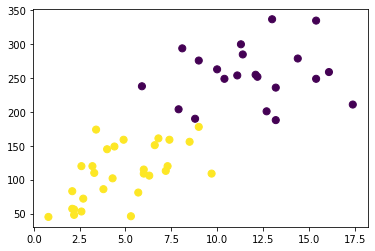

In [ ]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=labels,s=50,cmap="viridis");

In [ ]:
centers = k_means.cluster_centers_
centers

array([[ 11.85714286, 255.        ,  67.61904762,  28.11428571],
       [  4.84137931, 109.75862069,  64.03448276,  16.24827586]])

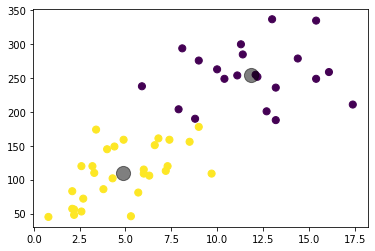

In [ ]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=labels,s=50,cmap="viridis");
plt.scatter(centers[:,0],centers[:,1],c="black",s=200,alpha=0.5);

##Elbow Yöntemi(Optimum küme sayısı belirleme)

In [ ]:
ssd=[]
K = range(1,30)
for k in K:
  k_means = KMeans(n_clusters=k).fit(df)
  ssd.append(k_means.inertia_)

Text(0.5, 1.0, 'Optimum küme sayısı için elbow yöntemi')

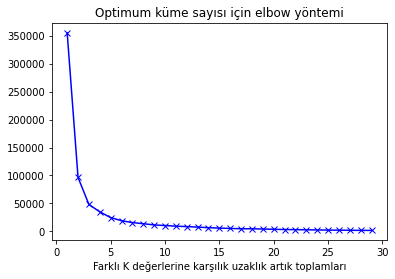

In [ ]:
plt.plot(K,ssd,"bx-")
plt.xlabel("Farklı K değerlerine karşılık uzaklık artık toplamları")
plt.title("Optimum küme sayısı için elbow yöntemi")

In [ ]:
!pip install yellowbrick

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

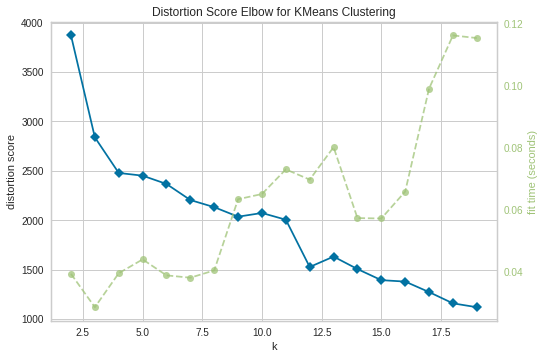

In [ ]:
k_means = KMeans()
visu = KElbowVisualizer(k_means,k=(2,20))
visu.fit(df)
visu.poof();

In [ ]:
k_means = KMeans(n_clusters=4).fit(df)
k_means

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
sets = k_means.labels_

In [ ]:
pd.DataFrame({"States":df.index,"Sets":sets})

In [ ]:
df["Set Number"] = sets

In [ ]:
df

,Murder,Assault,UrbanPop,Rape,Set Number
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,2
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,0


#Hiyerarşik Kümeleme

In [ ]:
from scipy.cluster.hierarchy import linkage

In [ ]:
hc_complete = linkage(df,"complete")
hc_average = linkage(df,"average")

In [ ]:
from scipy.cluster.hierarchy import dendrogram

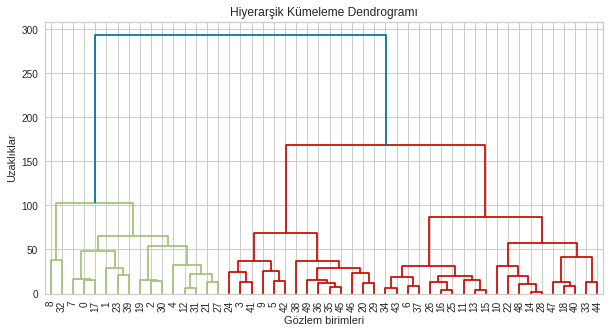

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Hiyerarşik Kümeleme Dendrogramı")
plt.xlabel("Gözlem birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_complete,leaf_font_size=10);

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Hiyerarşik Kümeleme Dendrogramı")
plt.xlabel("Gözlem birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_complete,
           truncate_mode = "lastp",
           p=10,
           show_contracted = True,
           leaf_font_size=10);

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Hiyerarşik Kümeleme Dendrogramı")
plt.xlabel("Gözlem birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,leaf_font_size=10);

#PCA

In [ ]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
df = df._get_numeric_data()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df = StandardScaler().fit_transform(df)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

In [ ]:
comp_df = pd.DataFrame(data=pca_fit,columns=["comp1","comp2"]) 
comp_df

,comp1,comp2
0,0.076848,1.653525
1,0.337127,-2.320560
2,3.408362,0.755757
3,-2.642221,-0.361486
4,1.071681,-1.511674
...,...,...
258,-0.152111,-0.331665
259,3.241373,-0.391942
260,-1.206322,-0.625714
261,2.084856,-2.059851


In [ ]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801])

Optimum component sayısı

Text(0, 0.5, 'kümülatif varyans oranı')

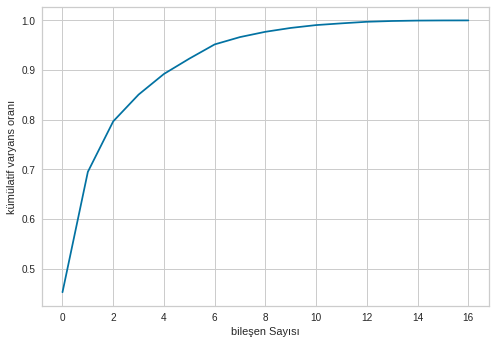

In [ ]:
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_));
plt.xlabel("bileşen Sayısı")
plt.ylabel("kümülatif varyans oranı")

In [ ]:
pca_final = PCA(n_components=3)
pca_fit = pca_final.fit_transform(df)

In [ ]:
pca_final.explained_variance_ratio_

array([0.45245466, 0.24246801, 0.1016968 ])